# Performing Sampling and Point Estimation

## 📚 Learning Objectives

By completing this notebook, you will:
- Perform sampling from populations
- Implement point estimation for population parameters
- Compare different sampling methods
- Evaluate estimator properties (bias, variance, consistency)

## 🔗 Prerequisites

- ✅ Understanding of probability distributions
- ✅ Understanding of statistical concepts
- ✅ Python, NumPy, Matplotlib knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 03, Unit 5**:
- Performing sampling and point estimation
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 5 Practical Content

---

## Introduction

**Sampling** involves selecting a subset from a population, and **point estimation** uses sample statistics to estimate population parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("✅ Libraries imported!")
print("\nPerforming Sampling and Point Estimation")
print("=" * 60)

✅ Libraries imported!

Performing Sampling and Point Estimation


## Part 1: Simple Random Sampling and Estimation


Part 1: Simple Random Sampling and Point Estimation

Population:
  True mean (μ): 49.9680
  True std (σ): 15.0512
  Population size: 10000

Sampling Results (n=100, 1000 samples):
  Mean of estimates: 49.9681
  Bias: 0.0002
  Std of estimates: 1.0933
  Standard error: 1.5051

  Std estimates - Mean: 15.0436
  Std estimates - Bias: -0.0076


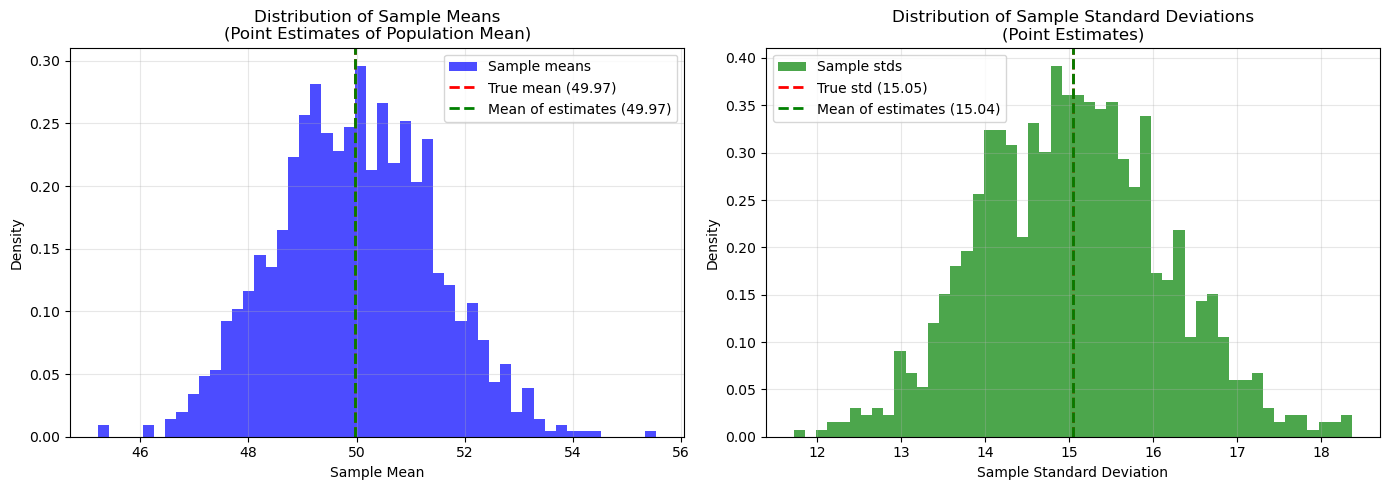


✅ Sampling and point estimation demonstrated!


In [2]:
print("=" * 60)
print("Part 1: Simple Random Sampling and Point Estimation")
print("=" * 60)

# Create population
np.random.seed(42)
population = np.random.normal(50, 15, 10000)  # Mean=50, Std=15
true_mean = population.mean()
true_std = population.std()

print(f"\nPopulation:")
print(f"  True mean (μ): {true_mean:.4f}")
print(f"  True std (σ): {true_std:.4f}")
print(f"  Population size: {len(population)}")

# Simple random sampling
sample_size = 100
n_samples = 1000

estimates_mean = []
estimates_std = []

for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    estimates_mean.append(sample.mean())  # Point estimate of mean
    estimates_std.append(sample.std(ddof=1))  # Point estimate of std (Bessel's correction)

estimates_mean = np.array(estimates_mean)
estimates_std = np.array(estimates_std)

print(f"\nSampling Results (n={sample_size}, {n_samples} samples):")
print(f"  Mean of estimates: {estimates_mean.mean():.4f}")
print(f"  Bias: {estimates_mean.mean() - true_mean:.4f}")
print(f"  Std of estimates: {estimates_std.std():.4f}")
print(f"  Standard error: {true_std/np.sqrt(sample_size):.4f}")

print(f"\n  Std estimates - Mean: {estimates_std.mean():.4f}")
print(f"  Std estimates - Bias: {estimates_std.mean() - true_std:.4f}")

# Visualize
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(estimates_mean, bins=50, density=True, alpha=0.7, color='blue', label='Sample means')
plt.axvline(true_mean, color='r', linestyle='--', linewidth=2, label=f'True mean ({true_mean:.2f})')
plt.axvline(estimates_mean.mean(), color='g', linestyle='--', linewidth=2, label=f'Mean of estimates ({estimates_mean.mean():.2f})')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Distribution of Sample Means\n(Point Estimates of Population Mean)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(estimates_std, bins=50, density=True, alpha=0.7, color='green', label='Sample stds')
plt.axvline(true_std, color='r', linestyle='--', linewidth=2, label=f'True std ({true_std:.2f})')
plt.axvline(estimates_std.mean(), color='g', linestyle='--', linewidth=2, label=f'Mean of estimates ({estimates_std.mean():.2f})')
plt.xlabel('Sample Standard Deviation')
plt.ylabel('Density')
plt.title('Distribution of Sample Standard Deviations\n(Point Estimates)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Sampling and point estimation demonstrated!")

## Part 2: Estimator Properties (Bias and Consistency)



Part 2: Estimator Properties (Bias and Consistency)

Sample size 10:
  Bias: 0.154360
  Variance: 24.269080
  MSE: 24.292907

Sample size 30:
  Bias: 0.029862
  Variance: 7.438072
  MSE: 7.438963

Sample size 50:
  Bias: -0.019627
  Variance: 4.791973
  MSE: 4.792358

Sample size 100:
  Bias: -0.007205
  Variance: 2.237051
  MSE: 2.237103



Sample size 200:
  Bias: 0.045066
  Variance: 1.045516
  MSE: 1.047547

Sample size 500:
  Bias: 0.006806
  Variance: 0.388116
  MSE: 0.388162


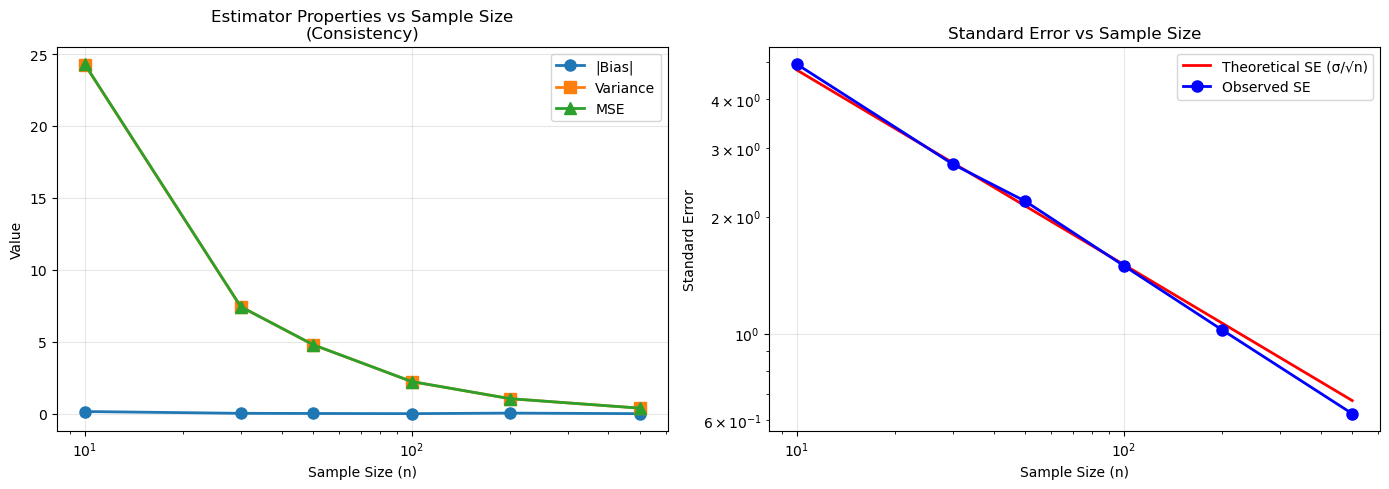


✅ Estimator properties (bias, variance, consistency) demonstrated!


In [3]:
print("\n" + "=" * 60)
print("Part 2: Estimator Properties (Bias and Consistency)")
print("=" * 60)

# Demonstrate consistency: estimator improves as sample size increases
sample_sizes = [10, 30, 50, 100, 200, 500]
n_samples = 500

bias_values = []
variance_values = []
mse_values = []

for n in sample_sizes:
    estimates = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=n, replace=False)
        estimates.append(sample.mean())
    estimates = np.array(estimates)
    
    bias = estimates.mean() - true_mean
    variance = estimates.var()
    mse = bias**2 + variance  # Mean Squared Error = Bias² + Variance
    
    bias_values.append(bias)
    variance_values.append(variance)
    mse_values.append(mse)
    
    print(f"\nSample size {n}:")
    print(f"  Bias: {bias:.6f}")
    print(f"  Variance: {variance:.6f}")
    print(f"  MSE: {mse:.6f}")

# Visualize consistency
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(sample_sizes, np.abs(bias_values), 'o-', label='|Bias|', linewidth=2, markersize=8)
plt.plot(sample_sizes, variance_values, 's-', label='Variance', linewidth=2, markersize=8)
plt.plot(sample_sizes, mse_values, '^-', label='MSE', linewidth=2, markersize=8)
plt.xlabel('Sample Size (n)')
plt.ylabel('Value')
plt.title('Estimator Properties vs Sample Size\n(Consistency)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')

plt.subplot(1, 2, 2)
plt.plot(sample_sizes, [true_std/np.sqrt(n) for n in sample_sizes], 'r-', label='Theoretical SE (σ/√n)', linewidth=2)
plt.plot(sample_sizes, [np.sqrt(v) for v in variance_values], 'bo-', label='Observed SE', linewidth=2, markersize=8)
plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error')
plt.title('Standard Error vs Sample Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()

print("\n✅ Estimator properties (bias, variance, consistency) demonstrated!")

## Summary

### Key Concepts:
1. **Sampling**: Selecting subset from population
2. **Point Estimation**: Using sample statistics to estimate parameters
3. **Bias**: Expected difference between estimate and true value
4. **Variance**: Spread of estimates around their mean
5. **Consistency**: Estimator improves as sample size increases
6. **MSE**: Mean Squared Error = Bias² + Variance

### Best Practices:
- Use unbiased estimators when possible
- Consider bias-variance tradeoff
- Larger samples reduce variance
- Use proper sampling methods (random, stratified, etc.)

### Applications:
- Population parameter estimation
- Statistical inference
- Quality control
- Survey analysis

**Reference:** Course 03, Unit 5: "Probability and Statistical Inference" - Sampling and point estimation practical content